In [1]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets


## Sampling 
An important part of data science consists of making conclusions based on the data in random samples.

Let’s start by drawing some samples.

Sampling Rows of a Table

Each row of a data table represents an individual; in top, each individual is a movie. 

Our examples are based on the top_movies_2017.csv data set.

In [2]:
top1 = Table.read_table('top_movies_2017.csv')
top2 = top1.with_column('Row Index', np.arange(top1.num_rows))
top = top2.move_to_start('Row Index')

top.set_format(make_array(3, 4), NumberFormatter)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
0,Gone with the Wind,MGM,"198,676,459","1,796,176,700",1939
1,Star Wars,Fox,"460,998,007","1,583,483,200",1977
2,The Sound of Music,Fox,"158,671,368","1,266,072,700",1965
3,E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,261,085,000",1982
4,Titanic,Paramount,"658,672,302","1,204,368,000",1997
5,The Ten Commandments,Paramount,"65,500,000","1,164,590,000",1956
6,Jaws,Universal,"260,000,000","1,138,620,700",1975
7,Doctor Zhivago,MGM,"111,721,910","1,103,564,200",1965
8,The Exorcist,Warner Brothers,"232,906,145","983,226,600",1973
9,Snow White and the Seven Dwarves,Disney,"184,925,486","969,010,000",1937


## Deterministic Sample
When you simply specify which elements of a set you want to choose. 

Sampling scheme doesn’t involve chance

In [3]:
top.take(make_array(3, 18, 100))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
3,E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,261,085,000",1982
18,The Lion King,Buena Vista,"422,783,777","792,511,700",1994
100,The Hunger Games,Lionsgate,"408,010,692","452,174,400",2012


In [4]:
top.where('Title', are.containing('Harry Potter'))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
74,Harry Potter and the Sorcerer's Stone,Warner Brothers,"317,575,550","497,066,400",2001
114,Harry Potter and the Deathly Hallows Part 2,Warner Brothers,"381,011,219","426,630,300",2011
131,Harry Potter and the Goblet of Fire,Warner Brothers,"290,013,036","401,608,200",2005
133,Harry Potter and the Chamber of Secrets,Warner Brothers,"261,988,482","399,302,200",2002
154,Harry Potter and the Order of the Phoenix,Warner Brothers,"292,004,738","377,314,200",2007
175,Harry Potter and the Half-Blood Prince,Warner Brothers,"301,959,197","359,788,300",2009
177,Harry Potter and the Prisoner of Azkaban,Warner Brothers,"249,541,069","357,233,500",2004


While these are samples, they are not random samples. They don’t involve chance.

## Random Sample:
* Before the sample is drawn, you have to know the selection probability of every group of people in the population
* Not all individuals / groups have to have equal chance of being selected

In [5]:
"""Choose a random start among rows 0 through 9;
then take every 10th row."""

start = np.random.choice(np.arange(10))
systematic_sample = top.take(np.arange(start, top.num_rows, 10))
systematic_sample.show()

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
4,Titanic,Paramount,"658,672,302","1,204,368,000",1997
14,Avatar,Fox,"760,507,625","865,082,100",2009
24,The Godfather,Paramount,"134,966,411","701,621,600",1972
34,Shrek 2,Dreamworks,"441,226,247","631,642,700",2004
44,Airport,Universal,"100,489,151","587,729,300",1970
54,Finding Nemo,Buena Vista,"380,843,261","547,504,100",2003
64,Back to the Future,Universal,"210,609,762","524,960,300",1985
74,Harry Potter and the Sorcerer's Stone,Warner Brothers,"317,575,550","497,066,400",2001
84,Men in Black,Sony,"250,690,539","485,542,200",1997
94,Mrs. Doubtfire,Fox,"219,195,243","468,364,200",1993


## Distributions


### Empirical Distribution
The word “empirical” means “observed”. 
Empirical distributions are distributions of observed data, such as data in random samples.

Our setting is a simple experiment: rolling a die multiple times and keeping track of which face appears. The table die contains the numbers of spots on the faces of a die. All the numbers appear exactly once, as we are assuming that the die is fair.

In [7]:
die = Table().with_column('Face', np.arange(1, 7))
die

Face
1
2
3
4
5
6


### Probability Distribution
Random quantity with various possible values “Probability distribution”:
* All the possible values of the quantity
* The probability of each of those values


As we increase the number of rolls in the simulation, the area of each bar gets closer to 16.67%, which is the area of each bar in the probability histogram.
The histogram below helps us visualize the fact that every face appears with probability 1/6. We say that the histogram shows the distribution of probabilities over all the possible faces. 
Since all the bars represent the same percent chance, the distribution is called uniform on the integers 1 through 6.


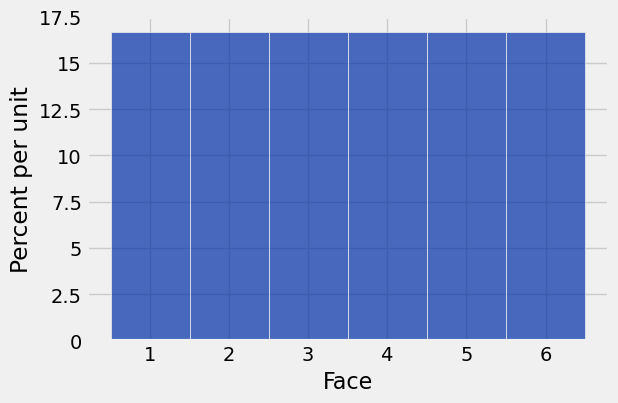

In [10]:
die_bins = np.arange(0.5, 6.6, 1)
die.hist(bins = die_bins)

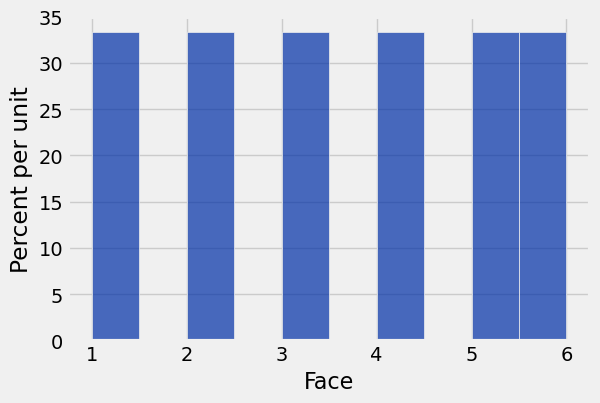

In [11]:
die.hist()

Empirical distributions are distributions of observed data.
They can be visualized by empirical histograms.
The Table method is called sample. It draws at random with replacement from the rows of a table.


Its argument is the sample size, and it returns a table consisting of the rows that were selected. An optional argument with_replacement=False specifies that the sample should be drawn without replacement.

Because we are going to do this repeatedly, we define a function empirical_hist_die that takes the sample size as its argument, rolls a die as many times as the argument, and then draws a histogram of the observed results.

Empirical distributions, on the other hand, are distributions of observed data. 
They can be visualized by empirical histograms.

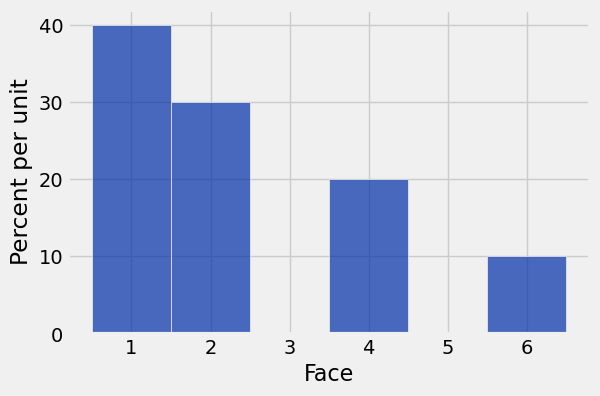

In [12]:
def empirical_hist_die(n):
    die.sample(n).hist(bins = die_bins)
empirical_hist_die(10)

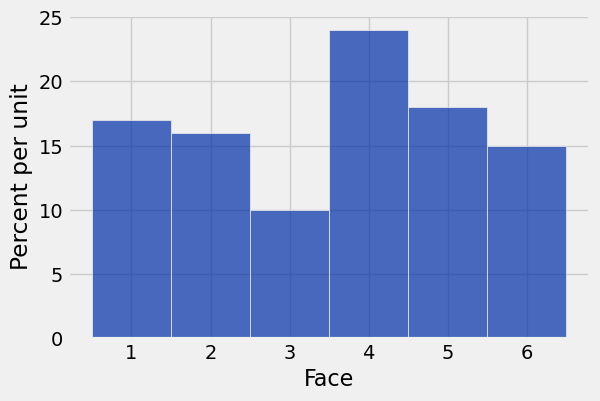

In [13]:
empirical_hist_die(100)

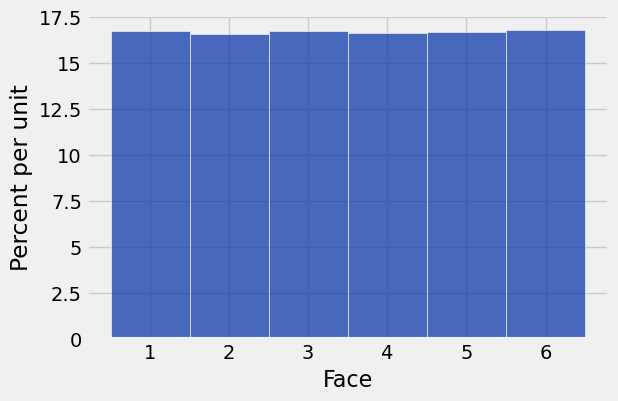

In [14]:
die.sample(100000).hist(bins=die_bins)

## Large Random Samples
### Sampling from a Population
As an example, we will study a population of flight delay times. The table united contains data for United Airlines domestic flights departing from San Francisco in the summer of 2015.
The columns are the date of the flight, the flight number, the destination airport code, and the departure delay time in minutes. Some delay times are negative: those flights left early.



In [15]:
united = Table.read_table('united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


In [5]:
united.column('Delay').min()

-16

In [9]:
united.column('Delay').max()

580

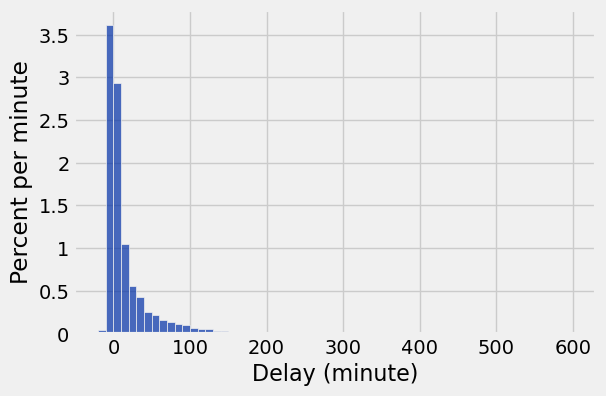

In [16]:
delay_bins = np.append(np.arange(-20, 301, 10), 600)
united.hist('Delay', bins = delay_bins, unit = 'minute')

In [12]:
united.where('Delay', are.above(200)).num_rows/united.num_rows

0.008390596745027125

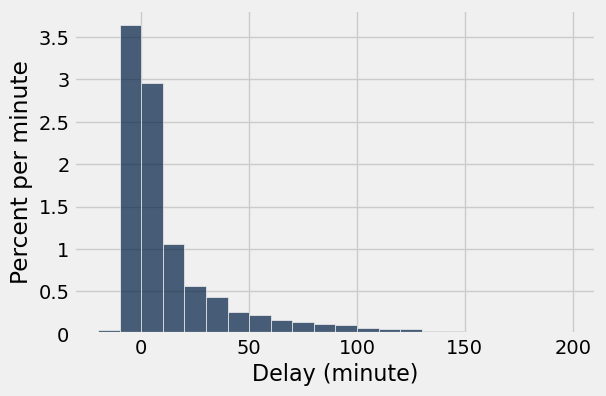

In [8]:
delay_bins = np.arange(-20, 201, 10)
united.hist('Delay', bins = delay_bins, unit = 'minute')

The height of the [0, 10) bar is just under 3% per minute, which means that just under 30% of the flights had delays between 0 and 10 minutes. That is confirmed by counting rows:

In [26]:
united.where('Delay', are.between(0, 10)).num_rows/united.num_rows

0.2935985533453888

## Empirical Distribution of the Sample
Let us now think of the 13,825 flights as a population, and draw random samples from it with replacement. 

It is helpful to package our code into a function.

The function empirical_hist_delay takes the sample size as its argument and draws an empiricial histogram of the results.

In [17]:
def empirical_hist_delay(n):
    united.sample(n).hist('Delay', bins = delay_bins, unit = 'minute')

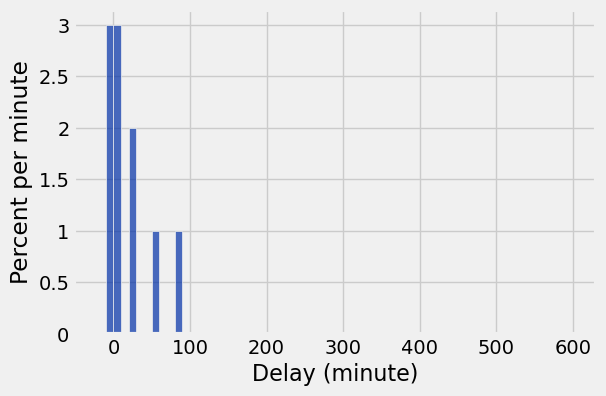

In [18]:
empirical_hist_delay(10)

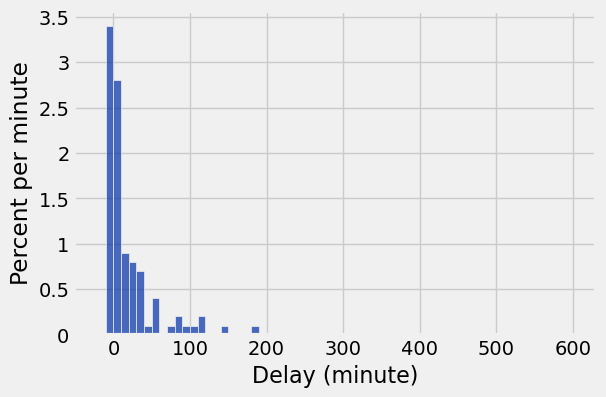

In [19]:
empirical_hist_delay(100)

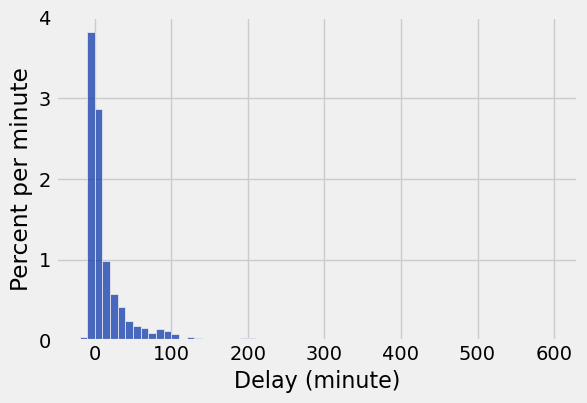

In [20]:
empirical_hist_delay(1000)

### Empirical distribution of the statistic:

* Based on simulated values of the statistic
* Consists of all the observed values of the statistic, and the proportion of times each value appeared
* Good approximation to the probability distribution of the statistic. if the number of repetitions in the simulation is large

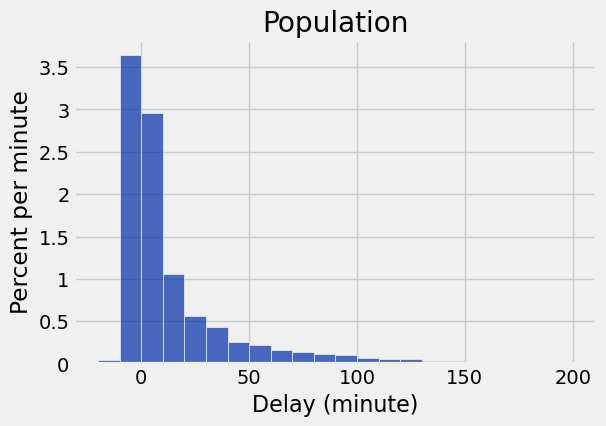

In [21]:
delay_bins = np.arange(-20, 201, 10)
united.hist('Delay', bins = delay_bins, unit = 'minute')
plt.title('Population');

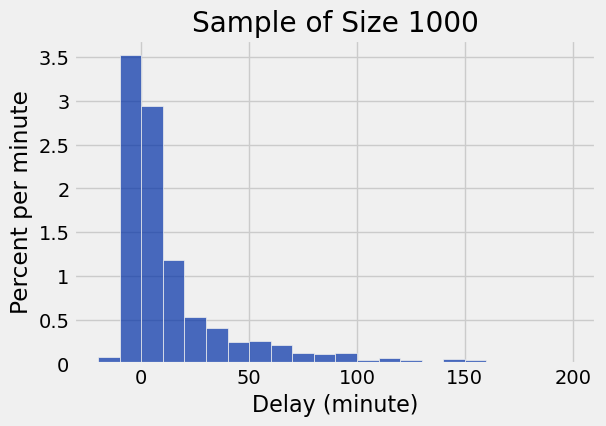

In [22]:
sample_1000 = united.sample(1000)
sample_1000.hist('Delay', bins = delay_bins, unit = 'minute')
plt.title('Sample of Size 1000');

### Parameter: 
* A quantity computed for the entire population
* Numerical quantities associated with a population are called parameters. 
* For the population of flights in united, we know the value of the parameter “median delay”:

In [17]:
# (Population) Parameter
np.median(united.column('Delay'))

2.0

In [18]:
united.where('Delay', are.below_or_equal_to(2)).num_rows / united.num_rows

0.5018444846292948

In [19]:
united.where('Delay', are.equal_to(2)).num_rows

480

In [ ]:
# (Sample) Statistic
np.median(united.sample(10).column('Delay'))

In [21]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [22]:
sample_median(10)

4.0

In [23]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = sample_median(10)
    sample_medians = np.append(sample_medians, new_median)

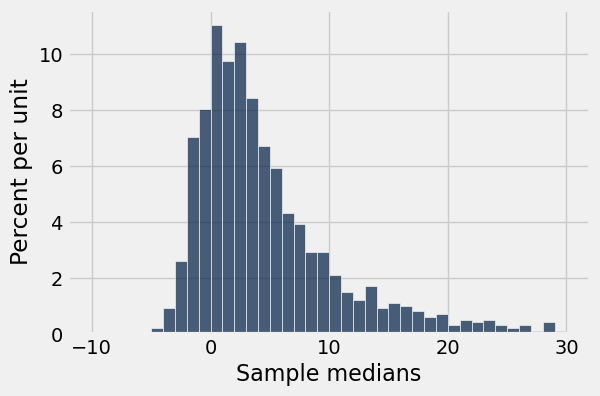

In [24]:
Table().with_column('Sample medians', sample_medians).hist(bins = np.arange(-10,31))

In [25]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = sample_median(1000)
    sample_medians = np.append(sample_medians, new_median)

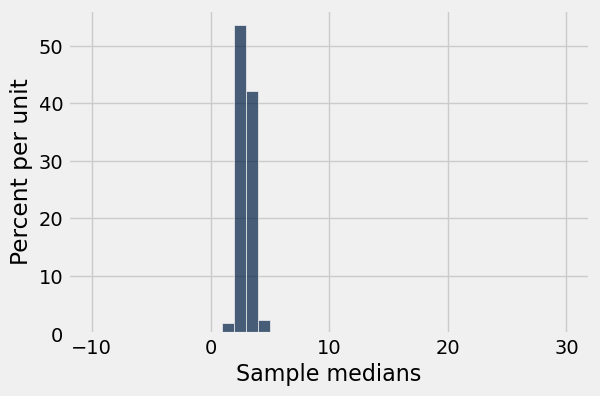

In [26]:
Table().with_column(
    'Sample medians', sample_medians).hist(bins = np.arange(-10,31))

## Probability Samples
### A population 
is the set of all elements from whom a sample will be drawn.

### A probability sample 
is one for which it is possible to calculate, before the sample is drawn, the chance with which any subset of elements will enter the sample.

In a probability sample, all elements need not have the same chance of being chosen.

### Statistical Inference:
Making conclusions based on data in random samples
### Statistic: 
A statistic is any number computed using the data in a sample. 

Estimation is a process with a random outcome

### Population (fixed) → Sample (random) → Statistic (random)

## Models
A model is a set of assumptions about the data

In data science, many models involve assumptions about processes that involve randomness
○ “Chance models”

## Approach to Assessment
If we can simulate data according to the assumptions of the model, we can learn what the model predicts.

We can then compare the predictions to the data that were observed.

If the data and the model’s predictions are not consistent, that is evidence against the model.

In [27]:
united = Table.read_table('united.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


In [28]:
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')

In [36]:
# (Population) Parameter
np.median(united.column('Delay'))

2.0

In [37]:
# (Sample) Statistic
np.median(united.sample(10).column('Delay'))

1.5

In [29]:
# (Sample) Statistic
np.median(united.sample(100).column('Delay'))

4.0

## Probability & Empirical Distributions of a Statistic

In [ ]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [ ]:
sample_median(10)

In [ ]:
num_simulations = 2000

In [ ]:
sample_medians = make_array()

for i in np.arange(num_simulations):
    new_median = sample_median(10)
    sample_medians = np.append(sample_medians, new_median)

In [ ]:
Table().with_column('Sample medians (size=10)', sample_medians).hist(bins=20)

In [ ]:
sample_medians = make_array()

for i in np.arange(num_simulations):
    new_median = sample_median(1000)
    sample_medians = np.append(sample_medians, new_median)

In [ ]:
Table().with_column('Sample medians (size=1K)', sample_medians).hist()

In [ ]:
sample_medians_10 = make_array()
sample_medians_100 = make_array()
sample_medians_1000 = make_array()

num_simulations = 2000

for i in np.arange(num_simulations):
    new_median_10 = sample_median(10)
    sample_medians_10 = np.append(sample_medians_10, new_median_10)
    new_median_100 = sample_median(100)
    sample_medians_100 = np.append(sample_medians_100, new_median_100)
    new_median_1000 = sample_median(1000)
    sample_medians_1000 = np.append(sample_medians_1000, new_median_1000)

In [ ]:
sample_medians = Table().with_columns('Size 10', sample_medians_10, 
                                      'Size 100', sample_medians_100,
                                      'Size 1000', sample_medians_1000)

In [ ]:
sample_medians.hist(bins = np.arange(-5, 30))

## Sampling from a Distribution

Sample at random from a categorical distribution

### sample_proportions(sample_size, pop_distribution)

Samples at random from the population

Returns an array containing the empirical distribution of the categories in the sample

## Assessing a Model
In data science, a model is a set of assumptions about data. Often, models include assumptions about chance processes used to generate data.

Sometimes, data scientists have to decide whether or not a model is good. In this section we will discuss an example of making such a decision.


## Steps in Assessing a Model

Choose a statistic to measure “discrepancy” between
model and data
1) Simulate the statistic under the model’s assumptions
2) Compare the data to the model’s predictions:
○ Draw a histogram of simulated values of the statistic
○ Compute the observed statistic from the real sample
3) If the observed statistic is far from the histogram, that is evidence against the model



## `sample_proportions`

`sample_proportions` can be used to randomly sample from multiple categories when you know the proportion of data points that are expected to fall in each category. `sample_proportions` takes two arguments: the sample size and an array that contains the distribution of categories in the population (should sum to 1).

sample_proportions returns an array that is the same length as the proportion array that is passed through. 

It contains the proportion of each category that appears in the sample.


## Mendel and Pea Flowers
## A Model
* Pea plants of a particular kind

* Each one has either purple flowers or white flowers

`Mendel’s model`:

* Each plant is purple-flowering with chance 75%,
* regardless of the colors of the other plants


For every plant, there is a 75% chance that it will have purple flowers, and a 25% chance that the flowers will be white, regardless of the colors in all the other plants.

To see whether his model was valid, Mendel grew 929 pea plants of this variety. Among these 929 plants, 705 had purple flowers.

## Choosing a Statistic

Take a sample, see what percent are purple-flowering
* If that percent is much larger or much smaller than 75,that is evidence against the model Distance from 75 is the key

* Statistic:
The absolute difference between the expected percent correct and the actual percent correct

| sample percent of purple-flowering plants - 75 |

* If the statistic is large, that is evidence against the
model

In [91]:
mendel_proportions = make_array(.75, .25)
sample_proportions(929, mendel_proportions)

array([ 0.74058127,  0.25941873])

In [92]:
def purple_flowers():
    return sample_proportions(929, predicted_proportions).item(0) * 100

In [98]:
purple_flowers()

76.7491926803014

In [51]:
purples = make_array()

for i in np.arange(10000):
    new_purple = purple_flowers()
    purples = np.append(purples, new_purple)
purples

array([ 75.78040904,  72.7664155 ,  74.8116254 , ...,  75.56512379,
        74.8116254 ,  74.48869752])

In [99]:
## Gregor Mendel had 929 plants, of which 709 had purple flowers
## Pea plants of a particular kind
## Each one has either purple flowers or white flowers
observed_purples = 709 / 929
observed_purples

0.7631862217438106

In [101]:
mendel_proportions = make_array(.75, .25)
hundred_flowers = sample_proportions(100, mendel_proportions)
hundred_flowers

array([ 0.76,  0.24])

In [81]:
simulated_proportion_purple = hundred_flowers.item(0)
simulated_proportion_white = hundred_flowers.item(1)

print("In our simulation, " + str(simulated_proportion_purple) + " of flowers were purple and " \
      + str(simulated_proportion_white) + " of flowers were white.")

In our simulation, 0.82 of flowers were purple and 0.18 of flowers were white.


In [102]:
expected_prop = 0.75

We define a function statistic which takes in an expected proportion and an actual proportion, and returns the The absolute difference between the expected percent correct and the actual percent correct

In [56]:

def statistic(expected_prop, actual_prop):
    return 100 * abs(expected_prop - actual_prop) 

In [103]:
# This saves the random state of our code so that we can 
# generate the same numbers each time we run the code.
# Generates pseudo-random number based on seed. Seed can be any number.
np.random.seed(16)

mendel_proportions = make_array(.75, .25) 
sample_proportion_purple  = sample_proportions(929, mendel_proportions).item(0) 
one_statistic = statistic(expected_prop, sample_proportion_purple ) 
one_statistic

0.5651237890204497

In [104]:
def simulation_and_statistic(mendel_proportions, expected_proportion_correct):
    '''Simulates 929
    Returns one statistic from the simulation.'''

    simulated_proportion = sample_proportions(292, mendel_proportions).item(0)
    simulated_statistic = statistic(expected_prop, simulated_proportion)
    return simulated_statistic


In [70]:
# Simulating Multiple Values of the Statistic
# The focus of our analysis is the variability in the counts.
# Let’s generate 10,000 simulated values.
num_repetitions = 1000

simulated_statistics = make_array() 

for i in np.arange(num_repetitions):
    one_statistic = simulation_and_statistic(model_proportions, expected_prop)
    simulated_statistics = np.append(simulated_statistics, one_statistic)
simulated_statistics

array([ 1.57298318,  1.23051742,  4.65517496,  0.88805167,  1.91544893,
        1.57298318,  0.88805167,  2.60038044,  2.25791468,  2.60038044,
        2.25791468,  1.57298318,  2.25791468,  4.99764071,  2.19414011,
        3.28531194,  3.22153737,  2.25791468,  3.28531194,  0.8242771 ,
        0.54558592,  3.97024345,  2.25791468,  0.88805167,  5.34010646,
        5.68257222,  0.54558592,  0.88805167,  1.57298318,  6.70996948,
        0.88805167,  2.94284619,  1.57298318,  3.6277777 ,  0.20312016,
        1.85167436,  4.65517496,  4.99764071,  2.25791468,  2.19414011,
        1.50920861,  2.87907162,  1.91544893,  0.54558592,  3.22153737,
        1.57298318,  0.8242771 ,  2.25791468,  0.48181135,  3.28531194,
        2.19414011,  3.6277777 ,  1.23051742,  4.99764071,  4.99764071,
        0.88805167,  0.20312016,  2.94284619,  2.94284619,  2.87907162,
        0.13934559,  1.85167436,  3.28531194,  0.48181135,  0.88805167,
        4.59140039,  1.50920861,  3.56400313,  1.57298318,  2.19

In [121]:
# The observed value of the test statistic is the value of the statistic 
# you get from the data in the study, not a simulated value. 
# Among Mendel’s 929 plants, 705 had purple flowers. 
# The observed value of the test statistic was therefore

expected_prop =  705 / 929
actual_prop = 0.75

# observed_statistic = statistic(expected_proportion_correct, .75)

# or 
observed_statistic = abs ( 100 * (705 / 929) - 75)
# observed_statistic = statistic(705 / 929, .75)
observed_statistic 

0.8880516684607045

In [117]:
proportion_greater_or_equal = np.count_nonzero(simulated_statistics>=observed_statistic)/len(simulated_statistics)
                                                                                             
proportion_greater_or_equal

0.749

We will define a function that returns one simulated value of the test statistic. Then we will use a for loop to collect 10,000 simulated values in an array.

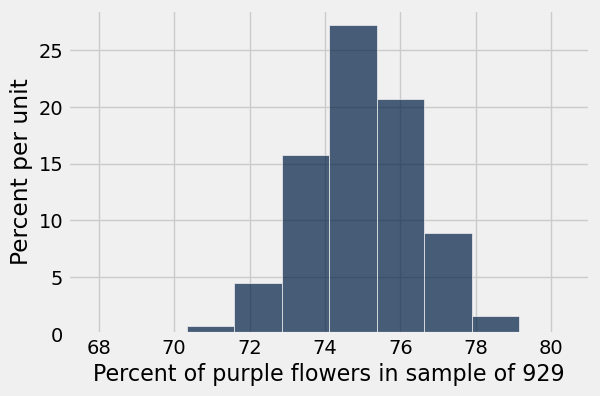

In [118]:
Table().with_column('Percent of purple flowers in sample of 929', purples).hist()

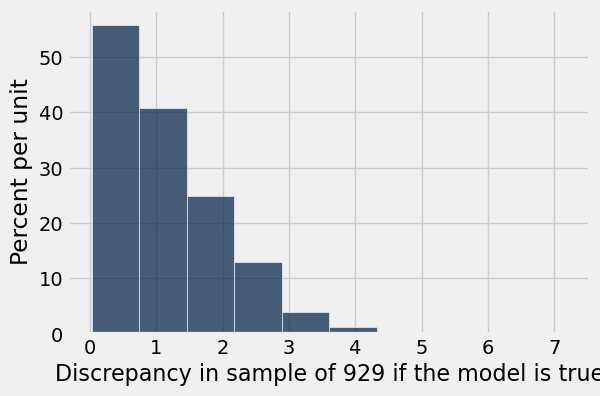

In [119]:
Table().with_column('Discrepancy in sample of 929 if the model is true', abs(purples- 75)).hist()

In [120]:
abs(observed_purples * 100 - 75)

1.318622174381062